In [1]:
#pip install tensorflow-datasets


Note: you may need to restart the kernel to use updated packages.


In [2]:
#pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [119]:
#pip install scikeras

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\lalyn\\anaconda3\\Lib\\site-packages\\~umpy.libs\\libopenblas64__v0.3.23-293-gc2f4bdbb-gcc_10_3_0-2bde3a66a51006b2b53eb373ff767a3f.dll'
Consider using the `--user` option or check the permissions.




     --------------------------------------- 14.9/14.9 MB 14.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.2
    Uninstalling numpy-1.26.2:
      Successfully uninstalled numpy-1.26.2


In [3]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from keras.layers import Dense
from keras import layers
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import array_to_img, img_to_array, load_img
#import tensorflow_datasets as tdfs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_predict
from keras import models
from keras import layers
from keras import regularizers
#from scikeras.wrappers import KerasRegressor
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import array_to_img, img_to_array, load_img
from keras import optimizers

from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler, LabelBinarizer
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import PIL.Image as Image

#import tensorflow_addons as tfa

In [4]:
#import tensorflow_datasets as tfds
"""cassava_data = tfds.load("cassava")
cassava_train, cassava_test = cassava_data["train"], cassava_data["test"]
assert isinstance(cassava_train, tf.data.Dataset)"""

'cassava_data = tfds.load("cassava")\ncassava_train, cassava_test = cassava_data["train"], cassava_data["test"]\nassert isinstance(cassava_train, tf.data.Dataset)'

In [ ]:
data_santa_dir = 'data/santa/'
data_not_santa_dir = 'data/not_santa/'
imgs_santa = [file for file in os.listdir(data_santa_dir) if file.endswith('.jpg')]

In [ ]:
train_dir = 'cats_dogs_downsampled/train'
validation_dir = 'cats_dogs_downsampled/val/'
test_dir = 'cats_dogs_downsampled/test/' 

In [ ]:
train_data_dir = 'data/train'
test_data_dir = 'data/validation'

In [6]:
print(os.listdir("data"))
#print(os.listdir("../data/train/"))

['cassava-disease.zip', 'extraimages.zip', 'random.txt', 'sample_submission_file.csv', 'test', 'test.zip', 'train', 'train.zip']


In [7]:
os.listdir('./data')

['cassava-disease.zip',
 'extraimages.zip',
 'random.txt',
 'sample_submission_file.csv',
 'test',
 'test.zip',
 'train',
 'train.zip']

In [8]:
from zipfile import ZipFile
  
# loading the temp.zip and creating a zip object
with ZipFile("data/cassava-disease.zip", 'r') as zObject:
  
    # Extracting all the members of the zip 
    # into a specific location.
    zObject.extractall(
        path='./data')

In [9]:
import os
Id = []
for dirname, _, filenames in os.walk('./data/train'):
    for filename in filenames:
        Id.append(os.path.join(dirname, filename))
Id[:5]

['./data/train\\cbb\\train-cbb-0.jpg',
 './data/train\\cbb\\train-cbb-1.jpg',
 './data/train\\cbb\\train-cbb-10.jpg',
 './data/train\\cbb\\train-cbb-100.jpg',
 './data/train\\cbb\\train-cbb-101.jpg']

In [10]:
train=pd.DataFrame()
train=train.assign(filename=Id)
train.head()

,filename
0,./data/train\cbb\train-cbb-0.jpg
1,./data/train\cbb\train-cbb-1.jpg
2,./data/train\cbb\train-cbb-10.jpg
3,./data/train\cbb\train-cbb-100.jpg
4,./data/train\cbb\train-cbb-101.jpg


In [ ]:
!unzip /kaggle/input/cassava-disease/extraimages.zip -d  /kaggle/working/ 
!unzip /kaggle/input/cassava-disease/test.zip -d /kaggle/working/
!unzip /kaggle/input/cassava-disease/train.zip -d /kaggle/working/

In [11]:
with ZipFile("data/test.zip", 'r') as zObject:
  
    # Extracting all the members of the zip 
    # into a specific location.
    zObject.extractall(
        path='./data')

In [12]:
with ZipFile("data/train.zip", 'r') as zObject:
  
    # Extracting all the members of the zip 
    # into a specific location.
    zObject.extractall(
        path='./data')

In [13]:
print(os.listdir("./data"))

['cassava-disease.zip', 'extraimages.zip', 'random.txt', 'sample_submission_file.csv', 'test', 'test.zip', 'train', 'train.zip']


In [70]:
print(os.listdir("./data/train"))
print(np.shape(os.listdir("./data/train")))

['cbb', 'cbsd', 'cgm', 'cmd', 'healthy']
(5,)


In [14]:
train_data_dir = 'data/train'
test_data_dir = 'data/test'

# Get all the data in the directory data/validation (132 images), and reshape them
test_generator = ImageDataGenerator().flow_from_directory(
        test_data_dir, 
        target_size=(256, 256), batch_size=3774)

# Get all the data in the directory data/train (790 images), and reshape them
train_generator = ImageDataGenerator().flow_from_directory(
        train_data_dir, 
        target_size=(256, 256), batch_size=5656)

# Create the datasets
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)

Found 3774 images belonging to 1 classes.
Found 5656 images belonging to 5 classes.


In [16]:
train_labels[1]

array([0., 0., 0., 1., 0.], dtype=float32)

In [76]:
test_labels

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [17]:
print(np.shape(train_images))
print(np.shape(train_labels))
print(np.shape(test_images))
print(np.shape(test_labels))

(5656, 256, 256, 3)
(5656, 5)
(3774, 256, 256, 3)
(3774, 1)


In [18]:
train_img_unrow = train_images.reshape(5656, -1)
test_img_unrow = test_images.reshape(3774, -1)

# Preview the shape of train_img_unrow
np.shape(train_img_unrow)

(5656, 196608)

In [20]:
X_train = train_images.reshape(5656, 196608).astype('float32')
#X_test = X_test.reshape(3774, 12288).astype('float32')
np.shape(X_train)

(5656, 196608)

In [21]:
train_images /= 255.
test_images /= 255.

## train test split

In [ ]:
train,test= train_test_split( train, test_size=0.2, random_state=42,shuffle=True, stratify=train['label'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## img class w MLPs

In [24]:
model_1 = models.Sequential()
model_1.add(layers.Dense(256, activation='tanh', input_shape=(196608,)))
model_1.add(layers.Dense(5, activation='softmax'))

model_1.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['acc'])


In [25]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                12582976  
                                                                 
 dense_3 (Dense)             (None, 5)                 325       
                                                                 
Total params: 12583301 (48.00 MB)
Trainable params: 12583301 (48.00 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
results_1 = model_1.fit(train_img_unrow, train_labels, epochs=5, batch_size=64) #validation_data=(test_img_unrow, test_labels)


Epoch 1/5


89/89 [==============================] - 24s 172ms/step - loss: 1.6771 - acc: 0.4671
Epoch 2/5
89/89 [==============================] - 10s 115ms/step - loss: 1.3484 - acc: 0.4699
Epoch 3/5
89/89 [==============================] - 11s 121ms/step - loss: 1.3439 - acc: 0.4699
Epoch 4/5
89/89 [==============================] - 14s 158ms/step - loss: 1.3432 - acc: 0.4703
Epoch 5/5
89/89 [==============================] - 13s 151ms/step - loss: 1.3451 - acc: 0.4699


In [27]:
results_train = model_1.evaluate(train_img_unrow, train_labels)

177/177 [==============================] - 27s 131ms/step - loss: 1.3441 - acc: 0.4699


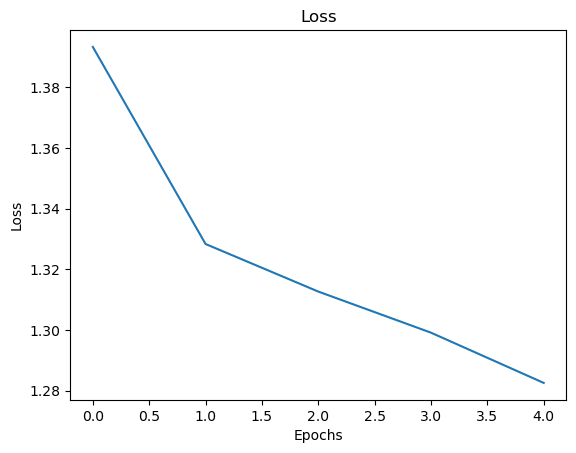

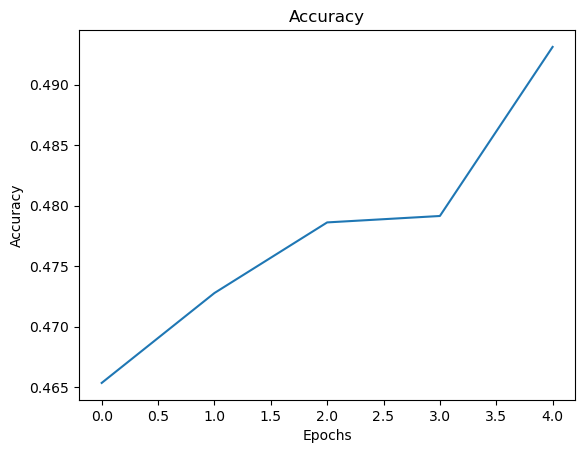

In [105]:
def visualize_training_results(results):
    history = results.history
    plt.figure()
    #plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    #plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure()
    #plt.plot(history['val_acc'])
    plt.plot(history['acc'])
    #plt.legend(['val_acc', 'acc'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()
visualize_training_results(results_1)

## Convolutional codealong- base model

In [ ]:
np.random.seed(123)
model = models.Sequential()
model.add(layers.Dense(20, activation='relu', input_shape=(12288,))) # 2 hidden layers
model.add(layers.Dense(7, activation='relu'))
model.add(layers.Dense(5, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_img,
                    train_y,
                    epochs=50,
                    batch_size=32,
                    validation_data=(val_img, val_y))

## CNN

In [110]:
cnn_model = models.Sequential()
cnn_model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(64 ,64,  3)))
cnn_model.add(layers.MaxPooling2D((2, 2)))

cnn_model.add(layers.Conv2D(32, (4, 4), activation='relu'))
cnn_model.add(layers.MaxPooling2D((2, 2)))

cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(layers.MaxPooling2D((2, 2)))

cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(64, activation='relu'))
cnn_model.add(layers.Dense(5, activation='sigmoid'))

cnn_model.compile(loss='binary_crossentropy',
              optimizer="sgd",
              metrics=['acc'])
cnn_history = cnn_model.fit(train_images,
                    train_labels,
                    epochs=30,
                    batch_size=32)#,
                   #validation_data=(val_images, val_y))

Epoch 1/30
177/177 [==============================] - 12s 61ms/step - loss: 0.4598 - acc: 0.4606
Epoch 2/30
177/177 [==============================] - 11s 60ms/step - loss: 0.4296 - acc: 0.4699
Epoch 3/30
177/177 [==============================] - 11s 61ms/step - loss: 0.4285 - acc: 0.4699
Epoch 4/30
177/177 [==============================] - 11s 60ms/step - loss: 0.4273 - acc: 0.4699
Epoch 5/30
177/177 [==============================] - 11s 61ms/step - loss: 0.4258 - acc: 0.4699
Epoch 6/30
177/177 [==============================] - 10s 58ms/step - loss: 0.4240 - acc: 0.4699
Epoch 7/30
177/177 [==============================] - 11s 60ms/step - loss: 0.4223 - acc: 0.4699
Epoch 8/30
177/177 [==============================] - 11s 62ms/step - loss: 0.4197 - acc: 0.4735
Epoch 9/30
177/177 [==============================] - 13s 72ms/step - loss: 0.4163 - acc: 0.4836
Epoch 10/30
177/177 [==============================] - 15s 82ms/step - loss: 0.4117 - acc: 0.4989
Epoch 11/30
177/177 [========

In [112]:
results_train = cnn_model.evaluate(train_images, train_labels)

177/177 [==============================] - 4s 19ms/step - loss: 0.3685 - acc: 0.5930


## CNN from scratch

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

## Tuning models- pipeline stuff- keras wrapper?

In [113]:
def create_baseline_model():
    
    # Initialize model
    model = models.Sequential()

    # First hidden layer
    model.add(layers.Dense(10, activation='relu', input_shape=(n_features,)))

    # Second hidden layer
    model.add(layers.Dense(5, activation='relu'))

    # Output layer
    model.add(layers.Dense(1, activation='linear'))

    # Compile the model
    model.compile(optimizer='SGD', 
                  loss='mse',  
                  metrics=['mse']) 
    
    # Return the compiled model
    return model

In [22]:
"""keras_wrapper_1 = KerasRegressor(create_baseline_model,  
                                 epochs=150, 
                                 batch_size=256, 
                                 verbose=0)"""

'keras_wrapper_1 = KerasRegressor(create_baseline_model,  \n                                 epochs=150, \n                                 batch_size=256, \n                                 verbose=0)'